# Predicting Price of Spanish Wines - Carmen Nguyen

# Project Goal

This project aims to build an effective model to predict the price of Spanish wines with a variety of factors. To reach this goal, we will build different models and compare their performance to find the best performer among them.

# Data Description

## Data Source

Kaggle: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

## Outcome Variable

`price`: Price in euros [€]

## Independent Variables

* `winery`: Winery name
* `wine`: Name of the wine
* `year`: Year in which the grapes were harvested
* `rating`: Average rating given to the wine by the users [from 1-5]
* `num_reviews`: Number of users that reviewed the wine
* `country`: Country of origin [Spain]
* `region`: Region of the wine
* `type`: Wine variety
* `body`: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]
* `acidity`: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

# Project Details

## 1. Data Exploration

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold, cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import files


data = files.upload()

Saving wines_SPA.csv to wines_SPA (4).csv


In [ ]:
# Import the dataset

data = pd.read_csv('wines_SPA.csv')
data.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
# Show data shape

data.shape

(7500, 11)

**Observation:** Our dataset has 7500 rows and 11 columns.

In [ ]:
# Show dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


**Observation:** Variable `year` is behaving as a categorical variable while it should be a numerical variable. Let's check what might have caused this.

In [ ]:
# Check unique values of 'year'

data['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

**Observation:** Indeed, there are values input as "N.V." as well as missing values input as "nan" for this variable `year`. We will treat these "N.V." values as missing values.

In [ ]:
# Replace 'N.V.' with NaN in the 'year' column

data['year'] = data['year'].replace(['N.V.'], np.nan)
data['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       nan, '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', '2006', '2000', '2003', '2002',
       '1991', '1994', '1990', '1989', '1987', '1986', '1981', '2001',
       '1968', '1964', '1982', '1974', '1983', '1955', '1980', '1972',
       '1953', '1958', '1942', '1965', '1992', '1973', '1997', '1967',
       '1975', '1910', '1961', '1954', '1988', '1969', '1951', '1928',
       '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

Let's change type of `year` from object to float.

In [ ]:
# Change type of 'year' to float

data['year'] = data['year'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7210 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 644.7+ KB


Let's check if there are any missing values.

In [ ]:
data.isnull().sum()

winery            0
wine              0
year            290
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

**Observation:** There are quite a few missing data for variables `body` and `acidity`, and some for `year` and `type`.

Now, let's look into some statistics of categorical and numerical data.

In [ ]:
# Split non-numeric data and numerical data

nonnum_data = data.select_dtypes(include='object')
num_data = data.select_dtypes(exclude='object')

In [ ]:
# Summary of non-numeric data

nonnum_data.describe()

,winery,wine,country,region,type
count,7500,7500,7500,7500,6955
unique,480,847,1,76,21
top,Contino,Reserva,Espana,Rioja,Rioja Red
freq,457,467,7500,2440,2357


**Observation:**

* We can see that there is only 1 unique value for `country`, which means this variable is a constant variable. We will have to drop it later as it would not add any value to our models.

* There are 480 unique values for `winery` (name of winery) and 847 unique values for `wine` (name of wine). Their high cardinality can lead to increased model complexity and computational overhead, especially when we plan to use dummy variables. Moreover, in our case, specific names of wineries and wines may not have a direct impact on the target variable (e.g., wine price) since we cannot account for any distinguishable features between them. Therefore, we will later drop these 2 variables from our dataset (performed in Part 3).

* Variables `region` and `type` has 76 and 21 unique values, respectively. Let's check the total number of each class to make sure that our data splitting will not have any issues.

In [ ]:
# Check unique counts of 'region' and 'type'

region_counts = data['region'].value_counts()
type_counts = data['type'].value_counts()

print('Number of occurrences for each region:')
print(region_counts)

print('Number of occurrences for each type:')
print(type_counts)

Number of occurrences for each region:
Rioja                              2440
Ribera del Duero                   1413
Priorato                            686
Toro                                300
Vino de Espana                      263
                                   ... 
Ribera del Gallego-Cinco Villas       1
Monterrei                             1
Jerez Cream                           1
Condado de Huelva                     1
Abona                                 1
Name: region, Length: 76, dtype: int64
Number of occurrences for each type:
Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant R

**Observation:**

* For `region`, there are quite a few classes that have only 1 entry.

* For `type`, there are some classes with a small number of entries.

* We will recategorize these low-frequency classes and group them under a new class named 'Other' (performed in Part 3). By doing this, we can make sure that our training set has all unique values of each variable.

In [ ]:
# Summary of numerical data

num_data.describe()

,year,rating,num_reviews,price,body,acidity
count,7210.000000,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,2013.495839,4.254933,451.109067,60.095822,4.158427,2.946612
std,6.940450,0.118029,723.001856,150.356676,0.583352,0.248202
min,1910.000000,4.200000,25.000000,4.990000,2.000000,1.000000
25%,2011.000000,4.200000,389.000000,18.900000,4.000000,3.000000
50%,2015.000000,4.200000,404.000000,28.530000,4.000000,3.000000
75%,2017.000000,4.200000,415.000000,51.350000,5.000000,3.000000
max,2021.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000


## 2. Exploratory Data Analysis (EDA)

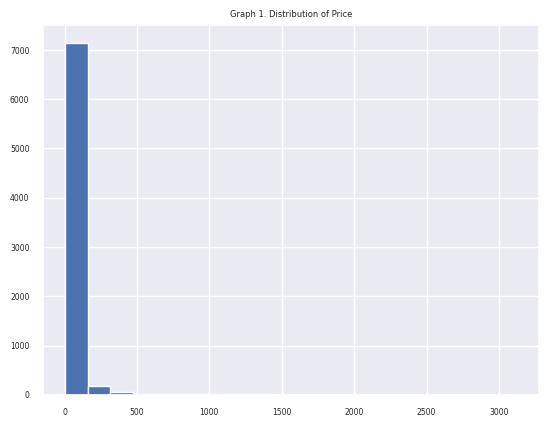

In [ ]:
plt.hist(data['price'], bins=20)
plt.title('Graph 1. Distribution of Price')

plt.show()

**Observation:** Graph 1 shows that `price` is highly skewed to the right. We will do a log transformation so that it is more normally distributed (performed in Part 4). This will help with our models' performance.

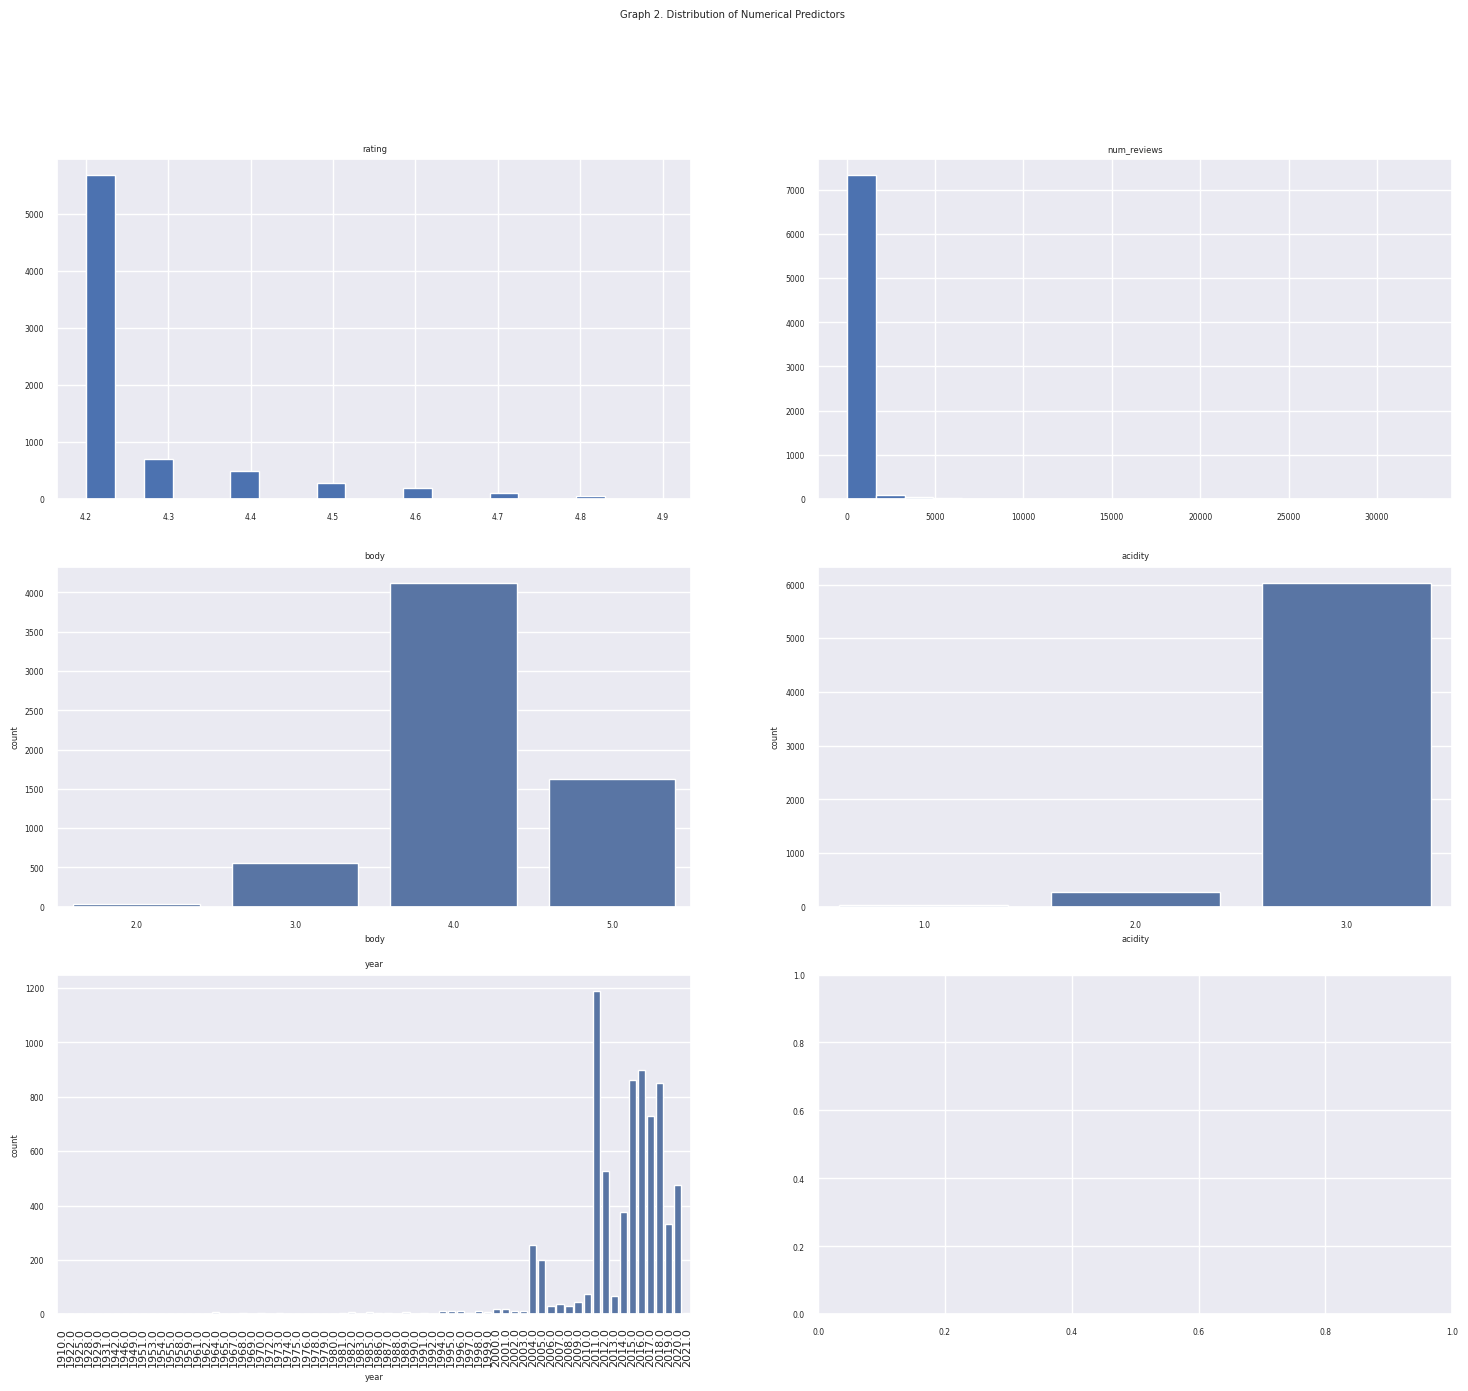

In [ ]:
# Plot distribution of the numerical independent variables

fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2, figsize=(18,15))

ax1.hist(data['rating'], bins = 20)
ax1.set_title('rating')

ax2.hist((data['num_reviews']), bins = 20)
ax2.set_title('num_reviews')

sns.countplot(data=data, x='body', ax=ax3)
ax3.set_title('body')

sns.countplot(data=data, x='acidity', ax=ax4)
ax4.set_title('acidity')

sns.countplot(data=data, x=data['year'], ax=ax5)
ax5.set_title('year')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90, fontsize=8)

plt.suptitle('Graph 2. Distribution of Numerical Predictors')
plt.show()

**Observation:** According to Graph 2, `num_reviews` is highly skewed to the right. We also need to transform it so that it is more normally distributed (performed in Part 4).

## 3. Data Pre-processing

### Handling Duplicates

First, let's check if our dataset has any duplicates.

In [ ]:
# Find all duplicates in the dataset

dup_rows = data[data.duplicated()]

# Then sort the dataframe on all columns to ensure duplicates are adjacent

sorted_dups = dup_rows.sort_values(by=list(dup_rows.columns))

sorted_dups.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
2067,Artadi,Valdegines,2016.0,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0
2092,Artadi,Valdegines,2016.0,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0
2117,Artadi,Valdegines,2016.0,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0
2142,Artadi,Valdegines,2016.0,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0
2167,Artadi,Valdegines,2016.0,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0


**Observation:** We see that there are multiple duplicates in the dataset. We will remove them for our analysis.

In [ ]:
# Remove duplicates and confirm there are no duplicates in the dataset

data = data.drop_duplicates()
print('Number of Duplicates:', len(data[data.duplicated()]))
print('After removing duplicates, the shape of the dataset is:', data.shape)

Number of Duplicates: 0
After removing duplicates, the shape of the dataset is: (2048, 11)


**Observation:** So, after removing all the duplicates, we are left with 2048 rows and 11 columns. The dataset has a lot of duplicates.

### Handling Categorical and Missing Data

As noted in part 1, we will drop variables `country`, `winery`, and `wine` from the dataset.

In [ ]:
# Drop 'country', 'wine', and 'winery' from the dataset

data.drop(['country', 'wine', 'winery'], axis=1, inplace=True)
data.head()

,year,rating,num_reviews,region,price,type,body,acidity
0,2013.0,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,2018.0,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,2009.0,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,1999.0,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,1996.0,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Now, we will group classes of variables `region` and `type` with low entries. In this case, let's use 30 as our cutoff.

In [ ]:
# Find classes with less than 30 entries

low_frequency_classes_region = data['region'].value_counts()[data['region'].value_counts() < 30].index.tolist()
low_frequency_classes_type = data['type'].value_counts()[data['type'].value_counts() < 30].index.tolist()

# Replace these classes with 'Other'

data['region'] = data['region'].apply(lambda x: 'Other' if x in low_frequency_classes_region else x)

data['type'] = data['type'].apply(lambda x: 'Other' if x in low_frequency_classes_type else x)

Next, let's see how many missing values we have after removing all duplicates.

In [ ]:
# Check for missing values

data.isnull().sum()

year            72
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

**Observation:** There are missing values for variables `year`, `type`, `body`, and `acidity`. We need to handle them for analysis.

For variable `year` with 72 missing records, we will drop them from our dataset.

In [ ]:
# Drop rows with missing values in the 'year' column

data = data.dropna(subset=['year'])
data.isnull().sum()

year             0
rating           0
num_reviews      0
region           0
price            0
type            99
body           262
acidity        262
dtype: int64

Now that `year` missing values have been dropped, we have 99 missing records for `type` and 262 for both `body` and `acidity`.

In [ ]:
# Count the number of rows where both 'body' and 'acidity' are missing

missing_body_acidity = data[(data['body'].isna()) & (data['acidity'].isna())].shape[0]

print("Number of rows with missing values for both 'body' and 'acidity':", missing_body_acidity)

# Count the number of rows where both 'body' and 'acidity' are missing

missing_body_acidity = data[(data['body'].isna()) & (data['type'].isna())].shape[0]

print("Number of rows with missing values for both 'body' and 'type':", missing_body_acidity)


Number of rows with missing values for both 'body' and 'acidity': 262
Number of rows with missing values for both 'body' and 'type': 99


**Observation:**

* There are 262 rows with missing values for both `body` and `acidity`, which means that all the rows that have `body` missing data also have `acidity` missing data.

* There are 99 rows with missing values for both `body` and `type`, which means that all the rows that have `type` missing data also have `body` and `acidity` missing data.

We will use K-Nearest Neighbors (KNN) algorithm to impute missing values for `type`, `body`, and `acidity`.

Before using KNN technique, we need to encode the categorical variables in our dataset (`region` and `type`). Noticing that all of them are nomial (have no order), we will use dummy encoding technique.

In [ ]:
# Get dummpy variables for categorical columns

data_encoded = pd.get_dummies(data, drop_first=True) #drop_first is to drop the first column of the newly created categorical variables to prevent multicollinearity between them

data_encoded.head()

,year,rating,num_reviews,price,body,acidity,region_Cava,region_Other,region_Priorato,region_Rias Baixas,...,type_Other,type_Pedro Ximenez,type_Priorat Red,type_Red,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sherry,type_Tempranillo,type_Toro Red
0,2013.0,4.9,58,995.00,5.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018.0,4.9,31,313.50,4.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2009.0,4.8,1793,324.95,5.0,3.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1999.0,4.8,1705,692.96,5.0,3.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1996.0,4.8,1309,778.06,5.0,3.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Now that all of our data are encoded, we will use KNN method to impute the missing values.

In [ ]:
# KNN imputation

imputer = KNNImputer(n_neighbors=5)
data_encoded = pd.DataFrame(imputer.fit_transform(data_encoded),columns = data_encoded.columns)
data_encoded.isnull().sum()

year                         0
rating                       0
num_reviews                  0
price                        0
body                         0
acidity                      0
region_Cava                  0
region_Other                 0
region_Priorato              0
region_Rias Baixas           0
region_Ribera del Duero      0
region_Rioja                 0
region_Toro                  0
region_Vino de Espana        0
type_Cava                    0
type_Grenache                0
type_Other                   0
type_Pedro Ximenez           0
type_Priorat Red             0
type_Red                     0
type_Ribera Del Duero Red    0
type_Rioja Red               0
type_Rioja White             0
type_Sherry                  0
type_Tempranillo             0
type_Toro Red                0
dtype: int64

Now, there are no missing values in our dataset.

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1976 non-null   float64
 1   rating                     1976 non-null   float64
 2   num_reviews                1976 non-null   float64
 3   price                      1976 non-null   float64
 4   body                       1976 non-null   float64
 5   acidity                    1976 non-null   float64
 6   region_Cava                1976 non-null   float64
 7   region_Other               1976 non-null   float64
 8   region_Priorato            1976 non-null   float64
 9   region_Rias Baixas         1976 non-null   float64
 10  region_Ribera del Duero    1976 non-null   float64
 11  region_Rioja               1976 non-null   float64
 12  region_Toro                1976 non-null   float64
 13  region_Vino de Espana      1976 non-null   float

**Observation:** After pre-processing, we have a dataset named `data_encoded` with 1976 rows and 26 columns.

## 4. Data Manipulation

In this part, we will split our dataset into training & testing sets, with 75% data for training and 25% data for testing.

In [ ]:
# Separate outcome variable and independent variables

X = data_encoded.drop('price', axis=1)
Y = data_encoded['price']

# Split into training & testing sets

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size=0.25, random_state=42)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (1976, 25) (1976,) 
Training set  --->  (1482, 25) (1482,) 
Testing set   --->  (494, 25)  (494,)


Now that we have our training and testing sets, we will deal with skewness and standardize them.

As shown in Graph 1 and Graph 2, variables `price` and `num_reviews` are highly skewed. We will use log transformation for `price` and Box-Cox transformation for `num_reviews` to make them more normally distributed. Other predictors are categorical so we will leave them as they are.

In [ ]:
# Log transform the target variable

Train_Y = np.log(Train_Y)
Test_Y = np.log(Test_Y)

# Apply Box-Cox transformation to the 'num_ratings' column

Train_X['num_reviews'] = boxcox(Train_X['num_reviews'])[0]
Test_X['num_reviews'] = boxcox(Test_X['num_reviews'])[0]

Next, we standardize all independent variables except for the newly created dummy variables.

In [ ]:
# Standardize the predictor variables

scaler = StandardScaler()

# Select columns for standardization

columns_to_standardize = ['year', 'rating', 'num_reviews', 'body', 'acidity']

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = Train_X.copy()
Train_X_std[columns_to_standardize] = scaler.fit_transform(Train_X[columns_to_standardize])
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = Test_X.copy()
Test_X_std[columns_to_standardize] = scaler.transform(Test_X[columns_to_standardize])
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,year,rating,num_reviews,body,acidity,region_Cava,region_Other,region_Priorato,region_Rias Baixas,region_Ribera del Duero,...,type_Other,type_Pedro Ximenez,type_Priorat Red,type_Red,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sherry,type_Tempranillo,type_Toro Red
count,1.482000e+03,1.482000e+03,1.482000e+03,1.482000e+03,1.482000e+03,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,...,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,-3.775657e-15,4.084902e-15,6.388652e-16,1.399990e-15,7.982818e-16,0.017544,0.230769,0.131579,0.016869,0.277328,...,0.058030,0.012821,0.124831,0.111336,0.275304,0.221323,0.014845,0.001350,0.032389,0.041835
std,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,0.131331,0.421467,0.338147,0.128824,0.447831,...,0.233879,0.112538,0.330639,0.314654,0.446818,0.415277,0.120972,0.036724,0.177090,0.200280
min,-8.699207e+00,-1.362422e+00,-1.701816e+00,-3.641090e+00,-6.802383e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.986940e-02,-6.878113e-01,-8.466278e-01,-4.337104e-01,2.252445e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.405975e-01,-1.320088e-02,-4.025490e-02,-4.337104e-01,2.252445e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.127842e-01,6.614096e-01,8.156257e-01,1.169979e+00,2.252445e-01,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.571578e-01,3.359851e+00,2.309598e+00,1.169979e+00,2.252445e-01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



                                          Standardardization on Testing set                                          


,year,rating,num_reviews,body,acidity,region_Cava,region_Other,region_Priorato,region_Rias Baixas,region_Ribera del Duero,...,type_Other,type_Pedro Ximenez,type_Priorat Red,type_Red,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sherry,type_Tempranillo,type_Toro Red
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,...,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.0,494.000000,494.000000
mean,0.036831,0.001821,-0.592593,-0.072718,-0.070656,0.016194,0.244939,0.111336,0.018219,0.261134,...,0.082996,0.016194,0.107287,0.089069,0.255061,0.248988,0.030364,0.0,0.048583,0.032389
std,0.841979,0.975455,0.795077,1.016340,1.143126,0.126350,0.430487,0.314867,0.133877,0.439698,...,0.276156,0.126350,0.309792,0.285132,0.436337,0.432865,0.171762,0.0,0.215213,0.177210
min,-7.149526,-1.362422,-2.001905,-3.641090,-6.802383,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,-0.089869,-0.687811,-1.213841,-0.433710,0.225244,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.340597,-0.013201,-0.625236,-0.433710,0.225244,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.512784,0.661410,0.028682,1.169979,0.225244,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,0.857158,2.685241,1.057142,1.169979,0.225244,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


## 5. Feature Selection/Extraction

Since there are too many columns, we will perform feature extraction to reduce dimensionality of our data.

First, let's check if there's multicollinearity in our data.

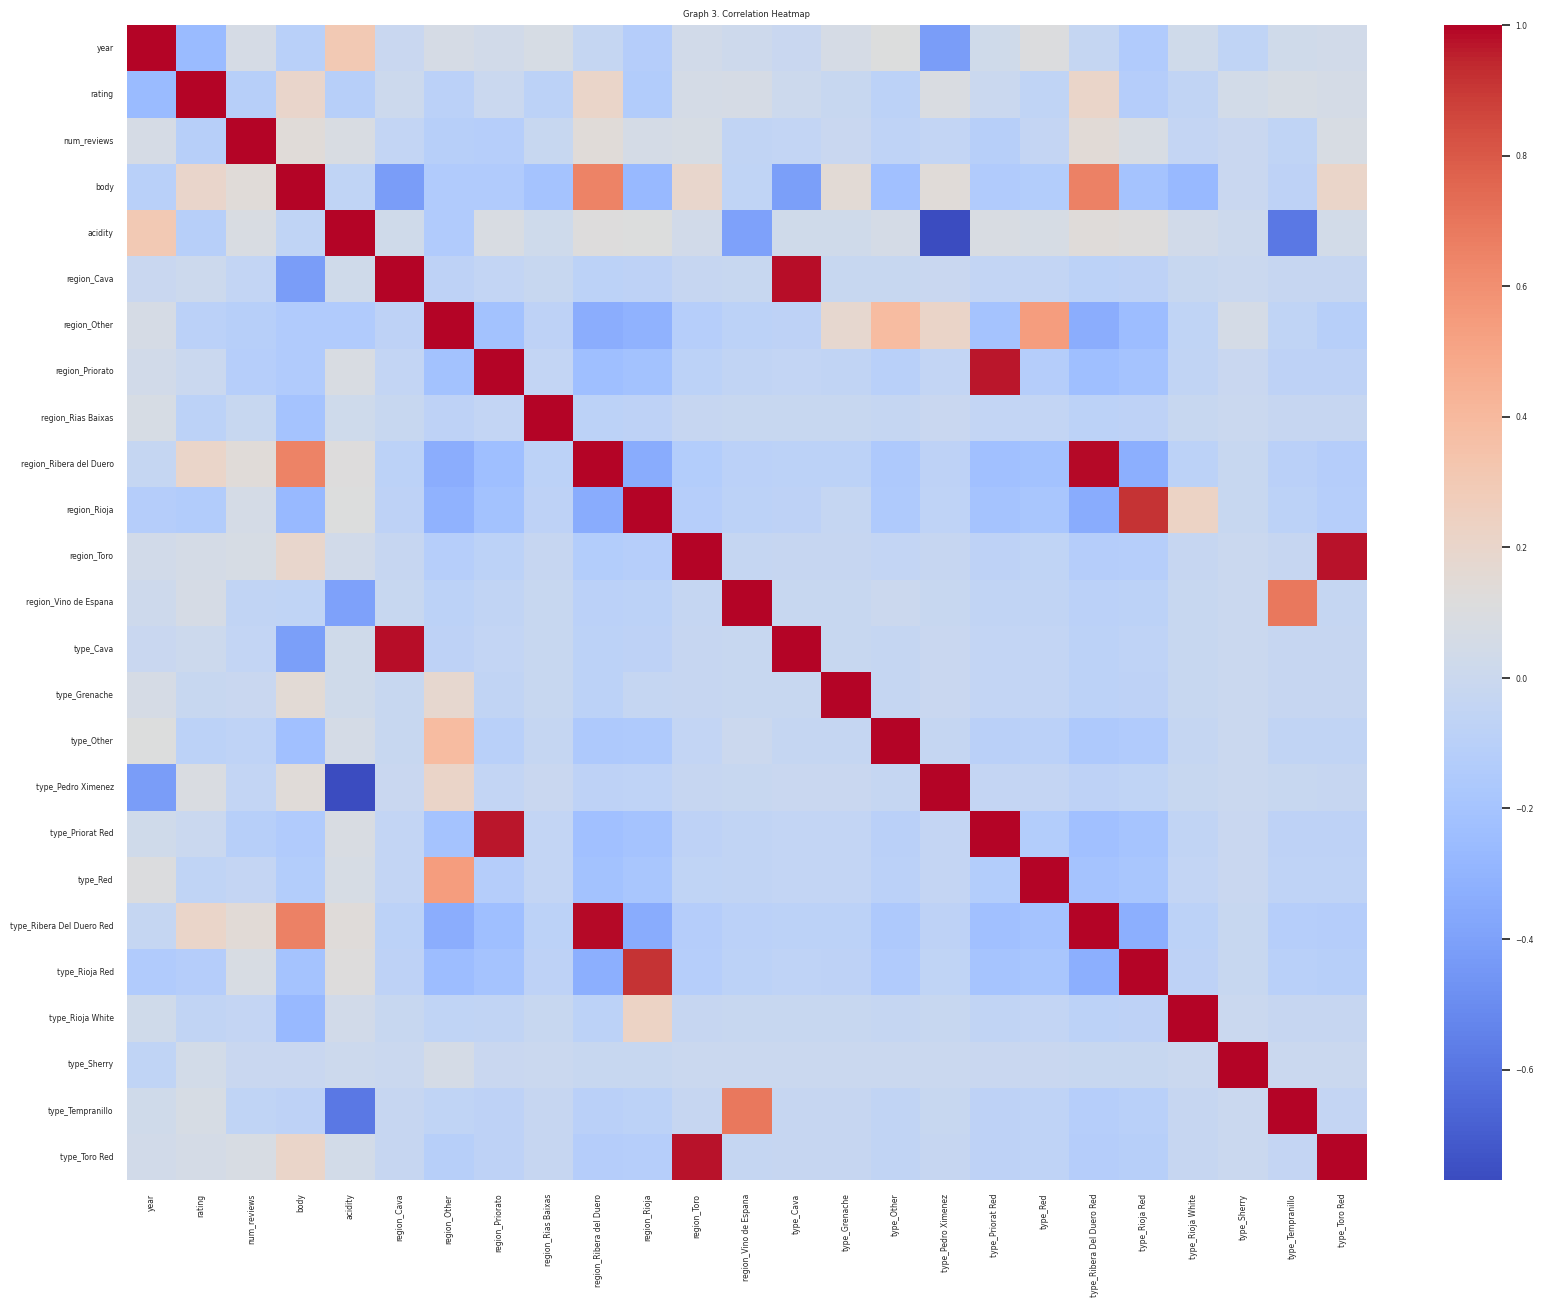

In [ ]:
# Heatmap for pairwise correlations

plt.figure(figsize=(20, 15))
sns.set(font_scale=0.5)
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Graph 3. Correlation Heatmap')
plt.show()

**Observation:** According to Graph 3, there is multicolliearity issue. We will solve this by removing minimum numbers of predictors to meet a threshold for pairwise correlations.

To do this, we will write an algorithm that removes the minimum number of predictors to ensure that all pairwise correlation are below a certain threshold. The algorithm is as follows:

- Calculate the correlation matrix of the predictors.
- Determine the two predictors associated with the largest absolute pairwise correlation (A and B).
- Determine the average absolute correlation between A and the other variables. Do the same for predictor B.
- If A has a larger average correlation, remove it; otherwise, remove predictor B.
- Repeat Steps 2-4 until no absolute correlations are above the threshold.

In [ ]:
def remove_predictors(data, threshold):

    """
    This function identifies and removes highly-correlated predictors in order to reduce pair-wise correlations
    # params:
        - data: a dataset in the format of pd DataFrame
        - threshold: pairwise absolute correlation cutoff
    # returns: a new DataFrame that contains all remaining predictors after elimination process
    """

    data_reduced=data.copy()

    while True:
        # Calculate the correlation matrix of the predictors

        corr_mat = data_reduced.corr()

        # Get the absolute pairwise correlations

        corr_mat = np.abs(corr_mat)
        np.fill_diagonal(corr_mat.values, 0)
        corr_mat=corr_mat.fillna(0)

        if corr_mat.max().max()<threshold:
            break


        # Determine the two predictors associated with the largest absolute pairwise correlation

        max_corr = np.unravel_index(np.argmax(corr_mat), corr_mat.shape)
        predictor_A = max_corr[0]
        predictor_B = max_corr[1]

        # Determine the average absolute correlation between A and the other variables

        avg_corr_A = np.mean(corr_mat.iloc[predictor_A, :])
        avg_corr_B = np.mean(corr_mat.iloc[predictor_B, :])

        # If A has a larger average correlation, remove it; otherwise, remove predictor B

        if avg_corr_A > avg_corr_B:
            remove_predictor = predictor_A
        else:
            remove_predictor = predictor_B

        # Remove the predictor

        print('Removed: '+str(data_reduced.columns.tolist()[remove_predictor]))

        del data_reduced[data_reduced.columns.tolist()[remove_predictor]]



    return data_reduced

Let's use threshold=0.75 for this function. This means that we want to eliminate the minimum number of predictors to achieve all pairwise correlations less than 0.75.

In [ ]:
# Remove correlated predictors for predictor training set

Train_X_reduced = remove_predictors(Train_X_std, 0.75)

Removed: type_Cava
Removed: type_Ribera Del Duero Red
Removed: type_Toro Red
Removed: region_Priorato
Removed: region_Rioja
Removed: acidity


In [ ]:
Train_X_reduced

,year,rating,num_reviews,body,region_Cava,region_Other,region_Rias Baixas,region_Ribera del Duero,region_Toro,region_Vino de Espana,type_Grenache,type_Other,type_Pedro Ximenez,type_Priorat Red,type_Red,type_Rioja Red,type_Rioja White,type_Sherry,type_Tempranillo
422,-0.434243,0.661410,0.300577,-0.433710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
371,-0.692523,0.661410,1.310303,1.169979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1519,0.340597,-0.687811,-0.617390,1.169979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
982,0.340597,-0.013201,-0.992708,-0.433710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1968,-0.003776,-1.362422,0.666766,-0.433710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.082317,-0.687811,1.395682,-0.433710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1294,0.512784,-0.687811,0.336684,-0.433710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,-0.175963,-0.013201,-0.325722,-3.641090,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.426691,-0.687811,-0.386015,-0.433710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Reduce test set columns based on train set columns

Test_X_reduced = Test_X_std.loc[:, Train_X_reduced.columns.tolist()]

# View new Test_X_reduced

Test_X_reduced

,year,rating,num_reviews,body,region_Cava,region_Other,region_Rias Baixas,region_Ribera del Duero,region_Toro,region_Vino de Espana,type_Grenache,type_Other,type_Pedro Ximenez,type_Priorat Red,type_Red,type_Rioja Red,type_Rioja White,type_Sherry,type_Tempranillo
1826,-0.520336,-1.362422,0.385572,-2.037400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1736,0.771064,-0.687811,-1.926733,-0.433710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
678,0.598878,-0.013201,0.334185,1.169979,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351,-0.520336,0.661410,0.783840,-0.433710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1728,0.426691,-0.687811,-1.891713,-0.433710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0.254504,-0.687811,0.486534,-0.433710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1784,-0.348150,-1.362422,0.725310,-0.433710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
670,-0.262056,-0.013201,0.387049,1.169979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1794,-1.467363,-1.362422,0.629273,-0.433710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


After removing correlated variables, we work with the training set `Train_X_reduced` and the testing set `Test_X_reduced`, both with 19 columns.

## 6. Predictive Modelling

In this part, we will be trying different regression models (both linear and non-linear) and then comparing their performance. Before that, let's write a function to evaluate our models.

In [ ]:
# Create a matrix to store evaluation results

Comparison_Matrix = pd.DataFrame(np.zeros([7,4]), columns=['Train-R2','Test-R2','Train-RMSE','Test-RMSE'])

def evaluate(n, train_pred, test_pred):

  # Calculate R-squared for training set

  train_r2 = r2_score(Train_Y, train_pred)

  # Calculate R-squared for testing set

  test_r2 = r2_score(Test_Y, test_pred)

  # Calculate RMSE for training set

  train_rmse = np.sqrt(mean_squared_error(Train_Y, train_pred))

  # Calculate RMSE for testing set

  test_rmse = np.sqrt(mean_squared_error(Test_Y, test_pred))

  # Show results

  print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
  print('\nR2-Score on Training set --->', train_r2)
  print('Root Mean Squared Error (RMSE) on Training set --->', train_rmse)

  print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
  print('\nR2-Score on Testing set --->', test_r2)
  print('Root Mean Squared Error (RMSE) on Testing set --->', test_rmse)

  # Store evaluation results to our matrix

  Comparison_Matrix.loc[n,'Train-R2']  = train_r2
  Comparison_Matrix.loc[n,'Test-R2']   = test_r2
  Comparison_Matrix.loc[n,'Train-RMSE']= train_rmse
  Comparison_Matrix.loc[n,'Test-RMSE'] = test_rmse

  # Plot predictions and actual values

  plt.scatter(Test_Y, test_pred)
  plt.xlabel('Actual Values')
  plt.ylabel('Predictions')
  p1 = max(max(test_pred), max(Test_Y))
  p2 = min(min(test_pred), min(Test_Y))
  plt.plot([p1, p2], [p1, p2], 'r-')

  plt.show()

### 6.1. Multiple Linear Regression (MLR)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

Intercept:  3.986878333355598


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6364330334014898
Root Mean Squared Error (RMSE) on Training set ---> 0.6457970423790599

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6201367242633748
Root Mean Squared Error (RMSE) on Testing set ---> 0.6150942050734085


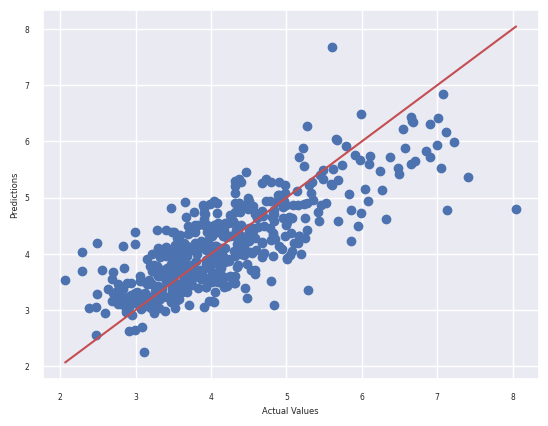

In [ ]:
# Fit linear regression model

MLR = LinearRegression()
MLR.fit(Train_X_reduced, Train_Y)

# Predict on training and testing sets

MLR_train_pred = MLR.predict(Train_X_reduced)
MLR_test_pred = MLR.predict(Test_X_reduced)

# Show results

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('Intercept: ', MLR.intercept_)
evaluate(0, MLR_train_pred, MLR_test_pred)

### 6.2. Ridge Regression Model (RRM)

With this model, the default hyperparameter alpha is set to be 1.0. We will perform hyperparameter tuning to get the alpha value that works best for our data. First of all, let's visualize how the RMSE of the Ridge regression model changes as the regularization parameter alpha varies.

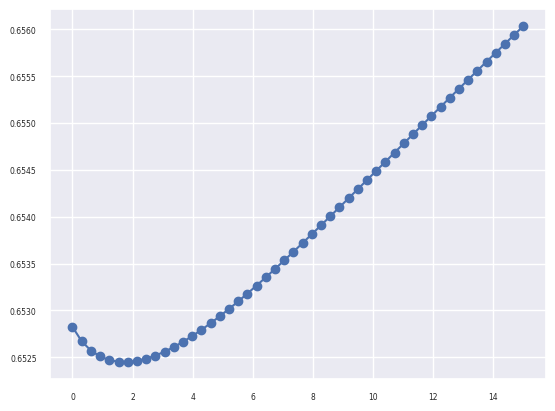

In [ ]:
# Get some alpha values

alphas = np.linspace(0.001,15,50)

# Get RMSE scores by performing cross-validation with 10 folds

score_rmse = []

for a in alphas:
    score = cross_val_score(Ridge(alpha=a), Train_X_reduced, Train_Y, cv=10, scoring='neg_mean_squared_error')
    score = np.sqrt(-1*score)
    score_rmse.append(np.mean(score))

# Plot RMSE for each alpha

plt.plot(alphas, score_rmse, '-o')
plt.show()

**Observation**: We can see from the above graph that an alpha value of around 2 will be optimal for our data.

Let's find out the exact value of optimal alpha using the sklearn built-in package RidgeCV.

In [ ]:
# Define model

ridgecv = RidgeCV(alphas = alphas, scoring = "neg_mean_squared_error", cv = 10)
ridgecv.fit(Train_X_reduced, Train_Y)

# Show optimal alpha
print('Best value of alpha for RRM: ', ridgecv.alpha_)

Best value of alpha for RRM:  1.837612244897959


Now, let's fit RRM with the tuned hyperparameter and see how it performs.

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

Intercept:  4.036543871066289


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6361193351795547
Root Mean Squared Error (RMSE) on Training set ---> 0.6460755903797684

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6206956316795511
Root Mean Squared Error (RMSE) on Testing set ---> 0.6146415326483774


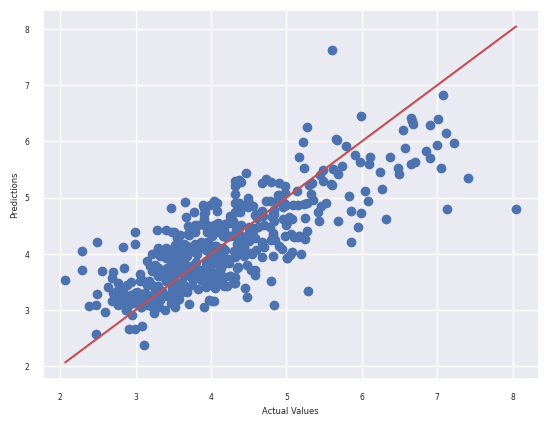

In [ ]:
# Fit Ridge regression model with tuned hyperparameter

RRM_tuned = Ridge(alpha = ridgecv.alpha_).fit(Train_X_reduced, Train_Y)

# Predict on training and testing sets

RRM_tuned_train_pred = RRM_tuned.predict(Train_X_reduced)
RRM_tuned_test_pred = RRM_tuned.predict(Test_X_reduced)

# Show results

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('Intercept: ', RRM_tuned.intercept_)
evaluate(1, RRM_tuned_train_pred, RRM_tuned_test_pred)

### 6.3. LASSO Regression Model (LRM)

Similar to the RRM, we also need to do hyperparameter tuning for LRM.

In [ ]:
# Define model

lassocv = LassoCV(alphas= alphas,cv=10).fit(Train_X_reduced, Train_Y)

# Show best alpha value

print('Best value of alpha for LRM: ',lassocv.alpha_)

Best value of alpha for LRM:  0.001


Now, let's see how the tuned LASSO model performs.

<<<----------------------------------- Evaluating LASSO Regression Model ----------------------------------->>>

Intercept:  4.142865809529144


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6353009059072448
Root Mean Squared Error (RMSE) on Training set ---> 0.6468017490335998

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6206071198018488
Root Mean Squared Error (RMSE) on Testing set ---> 0.6147132427409832


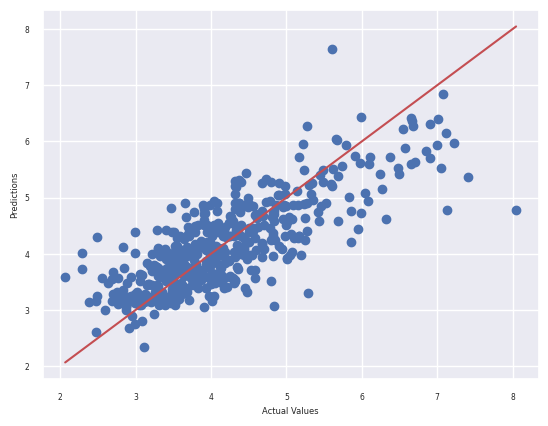

In [ ]:
# Fit LASSO regression model with tuned hyperparameter

LRM_tuned = Lasso(alpha=lassocv.alpha_).fit(Train_X_reduced,Train_Y)

# Predict on training and testing sets

LRM_tuned_train_pred = LRM_tuned.predict(Train_X_reduced)
LRM_tuned_test_pred = LRM_tuned.predict(Test_X_reduced)

# Show results

print('{}{}\033[1m Evaluating LASSO Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('Intercept: ', LRM_tuned.intercept_)
evaluate(2, LRM_tuned_train_pred, LRM_tuned_test_pred)

### 6.4. Elastic Net Regression (ENR)

First, let's perform hyperparameter tuning with the built-in package ElasticNetCV. For Elastic Net Regression, we need to tune 2 hyperparameters: alpha and l1_ratio.

In [ ]:
# Get some values for the ration

ratios = np.arange(0, 1, 0.01)

# Define and fit model

elasticcv = ElasticNetCV(l1_ratio=ratios, alphas = alphas, cv=10)
elasticcv.fit(Train_X_reduced, Train_Y)

ElasticNetCV(alphas=array([1.00000000e-03, 3.07102041e-01, 6.13204082e-01, 9.19306122e-01,
       1.22540816e+00, 1.53151020e+00, 1.83761224e+00, 2.14371429e+00,
       2.44981633e+00, 2.75591837e+00, 3.06202041e+00, 3.36812245e+00,
       3.67422449e+00, 3.98032653e+00, 4.28642857e+00, 4.59253061e+00,
       4.89863265e+00, 5.20473469e+00, 5.51083673e+00, 5.81693878e+00,
       6.12304082e+00, 6.429142...
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]))

Now, let's fit the ENR model with our tuned hyperparameters.

<<<----------------------------------- Evaluating Elastic Net Regression Model ----------------------------------->>>

Intercept:  4.029467319809603


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6362128548840867
Root Mean Squared Error (RMSE) on Training set ---> 0.645992562224121

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6206458700236004
Root Mean Squared Error (RMSE) on Testing set ---> 0.6146818493174641


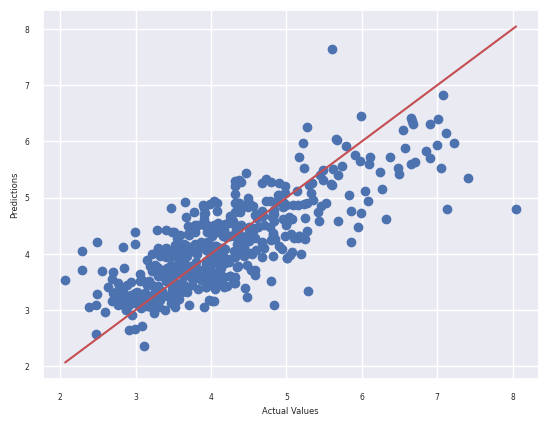

In [ ]:
# Fit ENR model with tuned hyperparameters

ENR_tuned = ElasticNet(l1_ratio=elasticcv.l1_ratio_, alpha=elasticcv.alpha_).fit(Train_X_reduced,Train_Y)

# Predict on training and testing sets

ENR_tuned_train_pred = ENR_tuned.predict(Train_X_reduced)
ENR_tuned_test_pred = ENR_tuned.predict(Test_X_reduced)

# Show results

print('{}{}\033[1m Evaluating Elastic Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('Intercept: ', ENR_tuned.intercept_)
evaluate(3, ENR_tuned_train_pred, ENR_tuned_test_pred)

### 6.5. Decision Tree (DT)

First, let's tune the hyperparameters for this model.

In [ ]:
# Hyperparameter range intialization for tuning

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[10,20,30,40] }

# Initialize the model

DT = DecisionTreeRegressor()

# Define and fit the model

decision_tree = GridSearchCV(DT, param_grid=parameters,scoring='neg_mean_squared_error', cv=10)
decision_tree.fit(Train_X_reduced, Train_Y)

decision_tree.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

Now, let's fit the model with tuned hyperparameters.

<<<----------------------------------- Evaluating Decision Tree Model ----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.5219918006243834
Root Mean Squared Error (RMSE) on Training set ---> 0.7404939532007637

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.4452506982419264
Root Mean Squared Error (RMSE) on Testing set ---> 0.7433209325590348


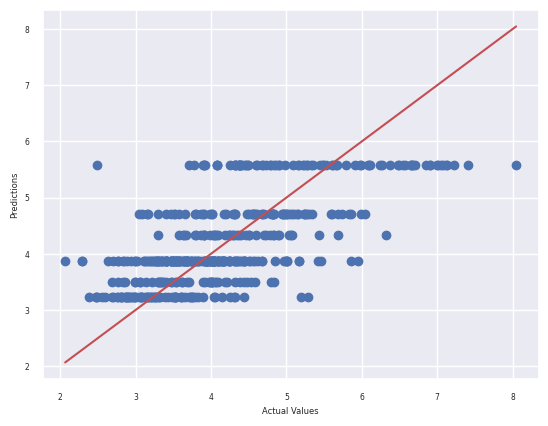

In [ ]:
# Fit with tuned hyperparameters

tuned_DT = DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter='best')
tuned_DT.fit(Train_X_reduced, Train_Y)

# Predict on training and testing sets

DS_tuned_train_pred = tuned_DT.predict(Train_X_reduced)
DS_tuned_test_pred = tuned_DT.predict(Test_X_reduced)

# Show results
print('{}{}\033[1m Evaluating Decision Tree Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
evaluate(4, DS_tuned_train_pred, DS_tuned_test_pred)


### 6.6. K-Nearest Neighbors (KNN)

The first step is to tune the hyperparameters for the KNN model. We do this with GridSearchCV.

In [ ]:
# Create a set of candidate hyperparameters

knn_parameters = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

# Initialize the KNeighborsRegressor

KNN = KNeighborsRegressor()

# Search for best hyperparameters

knn_reg = GridSearchCV(KNN, param_grid=knn_parameters, cv=10).fit(Train_X_reduced, Train_Y)

# Show best hyperparameters

print(knn_reg.best_params_)

{'n_neighbors': 6, 'weights': 'uniform'}


Now, we fit our KNN model with the tuned hyperparameters and see how it performs.

<<<----------------------------------- Evaluating K-Nearest Neighbors Model ----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7220289036025691
Root Mean Squared Error (RMSE) on Training set ---> 0.564681634833827

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6276414202602318
Root Mean Squared Error (RMSE) on Testing set ---> 0.6089878997283698


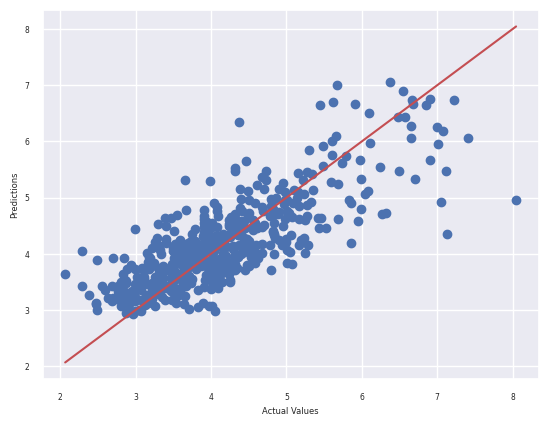

In [ ]:
# Fit with tuned hyperparameters

tuned_KNN = KNeighborsRegressor(n_neighbors=6, weights='uniform')
tuned_KNN.fit(Train_X_reduced, Train_Y)

# Predict on training and testing sets

KNN_tuned_train_pred = tuned_KNN.predict(Train_X_reduced)
KNN_tuned_test_pred = tuned_KNN.predict(Test_X_reduced)

# Show results
print('{}{}\033[1m Evaluating K-Nearest Neighbors Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
evaluate(5, KNN_tuned_train_pred, KNN_tuned_test_pred)

### 6.7. Random Forest (RF)

First, we tune our hyperparameters using RandomizedSearchCV. Instead of exhaustively searching through all combinations of hyperparameters like GridSearchCV does, it samples a fixed number of hyperparameter settings from specified probability distributions. It can be more efficient than GridSearchCV when the search space is large.

In [ ]:
# Create a set of candidate hyperparameters

rf_parameters = {'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [200, 400, 600,]}

# Initialize the RandomForestRegressor

RF = RandomForestRegressor()

# Search for best hyperparameters

random_forest = RandomizedSearchCV(RF, param_distributions=rf_parameters, cv=10).fit(Train_X_reduced, Train_Y)

# Show best hyperparameters

print(random_forest.best_params_)

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


Now that we have the best parameters, let's fit our model.

<<<----------------------------------- Evaluating Random Forest Model ----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8498237932259202
Root Mean Squared Error (RMSE) on Training set ---> 0.415053813604996

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6330770602005362
Root Mean Squared Error (RMSE) on Testing set ---> 0.604526597203618


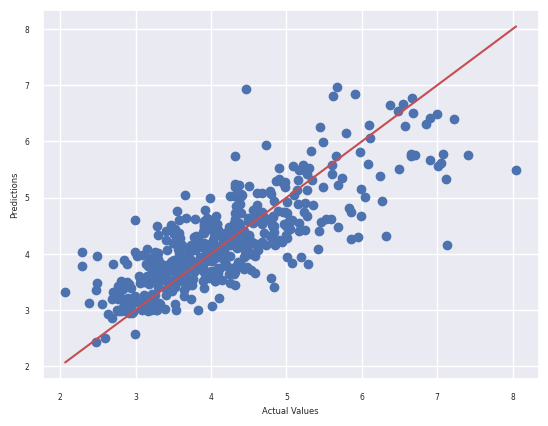

In [ ]:
# Fit with tuned hyperparameters

tuned_RF = RandomForestRegressor(n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=10, bootstrap=True)
tuned_RF.fit(Train_X_reduced, Train_Y)

# Predict on training and testing sets

RF_tuned_train_pred = tuned_RF.predict(Train_X_reduced)
RF_tuned_test_pred = tuned_RF.predict(Test_X_reduced)

# Show results

print('{}{}\033[1m Evaluating Random Forest Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
evaluate(6, RF_tuned_train_pred, RF_tuned_test_pred)

## 7. Model Evaluation & Conclusion

Finally, let's compare the performance of different models that we have built.

In [ ]:
# Show evaluation results

CM = Comparison_Matrix.copy()
CM.index = ['Multiple Linear Regression (MLR)','Ridge Regression Model (RRM)','LASSO Regression Model (LRM)','Elastic Net Regression (ENR)','Decision Tree (DT)','K-Nearest Neighbors (KNN)','Random Forest (RF)']
print('{}{}\033[1m Model Performance \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
CM

<<<----------------------------------- Model Performance ----------------------------------->>>



,Train-R2,Test-R2,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.636433,0.620137,0.645797,0.615094
Ridge Regression Model (RRM),0.636119,0.620696,0.646076,0.614642
LASSO Regression Model (LRM),0.635301,0.620607,0.646802,0.614713
Elastic Net Regression (ENR),0.636213,0.620646,0.645993,0.614682
Decision Tree (DT),0.521992,0.445251,0.740494,0.743321
K-Nearest Neighbors (KNN),0.722029,0.627641,0.564682,0.608988
Random Forest (RF),0.849824,0.633077,0.415054,0.604527


**Conclusion:**

* Multiple Linear Regression (MLR), Ridge Regression Model (RRM), LASSO Regression Model (LRM), and Elastic Net Regression (ENR) have similar performance in terms of R-squared values and RMSE for both training and testing sets.

* The performance of Decision Tree (DT) is lower compared to linear regression models, as indicated by lower R-squared values and higher RMSE for both training and testing sets. Decision trees might be overfitting the training data and not generalizing well to the testing data.

* K-Nearest Neighbors (KNN) performs better than linear regression and decision tree models in terms of R-squared values for both training and testing sets. However, its RMSE for the testing set is slightly higher than linear regression models, indicating that it might not be the best model for this dataset.

* Random Forest (RF) shows the best performance among all models in terms of R-squared values for both training and testing sets. It also has the lowest RMSE for the testing set, indicating that it generalizes well to unseen data and captures more variance compared to other models.

* In summary, based on the provided performance metrics, Random Forest seems to be the most precise model for this dataset, followed by K-Nearest Neighbors. However, since the simplest model, MLR, has very close performance metrics to Random Forest, it is the best candidate due to its simplicity and interpretability.